In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Euler Method

## Implementation 1 (Traditional)

In [5]:
def solve_pendulum(inic, g = 9.81, L = 5, start_time = 0, end_time = 10, dt = 0.001, saa = True):
    def thetadot(theta, omega):
        return omega

    def omegadot(theta, omega):
        if saa:
            return -(g/L) * theta
        else:
            return -(g/L) * np.sin(theta)

    phase = inic # theta, omega
    phases = [phase]

    t = [start_time]

    while t[-1] < end_time:
        theta_next = phase[0] + thetadot(*phase) * dt
        omega_next = phase[1] + omegadot(*phase) * dt

        phase = [theta_next, omega_next]

        phases.append(phase)
        t.append(t[-1] + dt)
        
    theta = [elem[0] for elem in phases]
    omega = [elem[1] for elem in phases]
    
    return (t, theta, omega)

## Implementation 2 (Numpy arrays)

## Results

In [72]:
def plot_pendulum(inic, saa_switch):
    t, theta, omega = solve_pendulum(inic, saa = saa_switch)

    plt.figure(figsize=(15, 5))

    plotting_data = [
        {
            "varname": r"Angular Displacement $\theta$", 
            "data": theta, 
            "y_units": "Rad"
        },
        {
            "varname": r"Angular Velocity $\omega$", 
            "data": omega, 
            "y_units": "Rad/s"
        },
    ]

    for i in range(len(plotting_data)):
        plt.subplot(1, len(plotting_data), i + 1) # rows, cols, index

        obj = plotting_data[i]
        plt.plot(t, obj["data"])

        plt.title(fr"""{obj["varname"]}
{["without", "with"][saa_switch]} SAA
with $\theta(0) = {np.round(np.degrees(inic))[0]}^\circ$, $\omega(0) = {np.round(np.degrees(inic))[1]}$ deg/s""")

        plt.xlabel("Time (s)")
        plt.ylabel(obj["y_units"])

    plt.show()

### 1. With $\sin \theta \approx \theta$

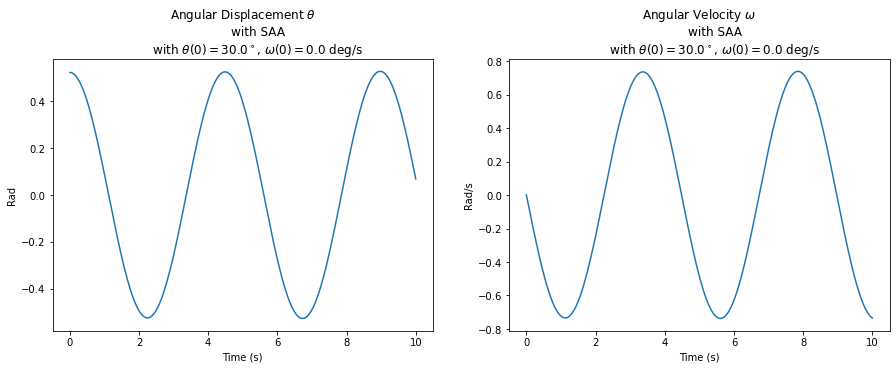

In [73]:
inic = [np.radians(30), np.radians(0)] # Initial conditions [theta (in Rad), omega (in Rad)]
saa_switch = True

plot_pendulum(inic, saa_switch)

### 2. Without $\sin \theta \approx \theta$

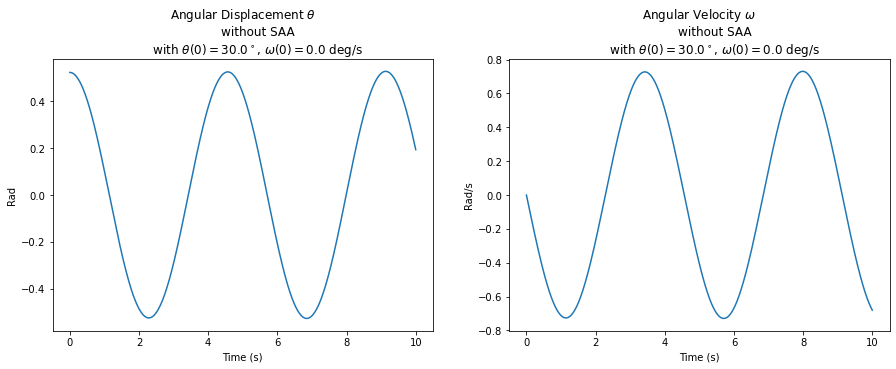

In [74]:
inic = [np.radians(30), np.radians(0)] # Initial conditions [theta (in Rad), omega (in Rad)]
saa_switch = False

plot_pendulum(inic, saa_switch)

### 3. Comparing with and without $\sin \theta \approx \theta$ with changing initial conditions

In [77]:
def compare_SAA(inic):
    plt.figure(figsize=(15, 5))
    
    plotting_data = [
        {
            "varname": r"Angular Displacement $\theta$", 
            "solutions_index": 1, 
            "y_units": "Rad"
        },
        {
            "varname": r"Angular Velocity $\omega$", 
            "solutions_index": 2, 
            "y_units": "Rad/s"
        },
    ]
    
    label_switch = lambda saa_switch: ["without", "with"][saa_switch]

    for i in range(len(plotting_data)):
        plt.subplot(1, len(plotting_data), i + 1) # rows, cols, index

        obj = plotting_data[i]
        for saa_switch in [True, False]:
            solutions = solve_pendulum(inic, saa = saa_switch) # t, theta, omega

            plt.plot(solutions[0], solutions[obj["solutions_index"]], label=f"{label_switch(saa_switch)} SAA")

        plt.title(fr"""{obj["varname"]}
with and without SAA
with $\theta(0) = {np.round(np.degrees(inic))[0]}^\circ$, $\omega(0) = {np.round(np.degrees(inic))[1]}$ deg/s""")

        plt.xlabel("Time (s)")
        plt.ylabel(obj["y_units"])
        plt.legend()

    plt.show()

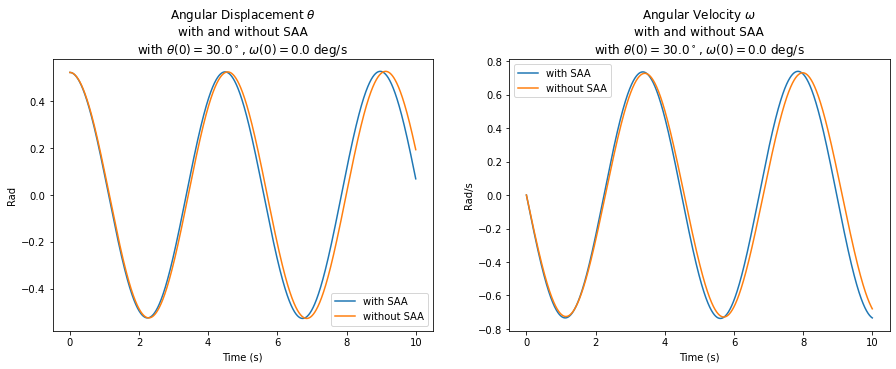

In [80]:
inic = [np.radians(30), np.radians(0)] # Initial conditions [theta (in Rad), omega (in Rad)]

compare_SAA(inic)